<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/Unsupervised_Machine_Learning_Agglomerative_Partitional_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2. Unsupervised Machine Learning**

**2.1. Clustering**

**2.1.1. Hierarchical Clustering**

**2.1.1.1. Agglomerative clustering**

**texte en gras**
Téléchargement des données nécessaires pour l'Atelier [Données](https://drive.google.com/file/d/1QNcIrgwoTWfBGj9_tgUy82ZbiqzS5ODX/view?usp=sharing)

     0
0    4
1    3
2    4
3    3
4    4
..  ..
195  2
196  0
197  2
198  0
199  2

[200 rows x 1 columns]


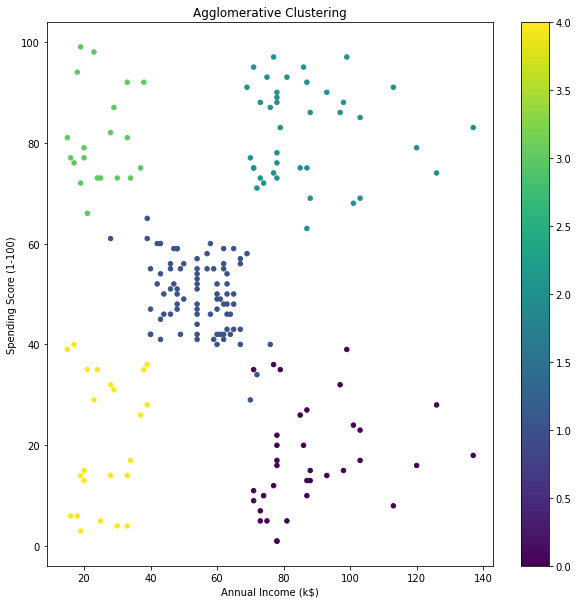

In [ ]:
# 1.Importation des données brutes
import pandas as pd
data=pd.read_csv("Mall_Customers.csv")

# 2.Prétraitement des données 
data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  # Transformation des caractéristiques
data

# 3.Construction du modèle
from sklearn.cluster import AgglomerativeClustering #Importation du modèle
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

# 4.Ajustement du modèle
clust_labels=model.fit_predict(data) 

# 5. Afficher les étiquettes des clusters pour chaque échantillon
agglomerative=pd.DataFrame(clust_labels)
print(agglomerative)

# 6. Visualisation des clusters
import matplotlib.pyplot as plt # Importation de la bibliothèque de visualisation 
fig =plt.figure(figsize=(10,10))#Création d'une figure vide
plot = plt.scatter(data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] ,c= agglomerative[0],  s=20)# Visualiser la distribution des données
plt.title("Agglomerative Clustering")# Ajouter un titre à la figure
plt.xlabel("Annual Income (k$)")# Ajouter un titre à l'axe des x
plt.ylabel("Spending Score (1-100)")
plt.colorbar(plot)# Créer une barre pour mieux lire les clusters

In [ ]:
agglomerative


,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [ ]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


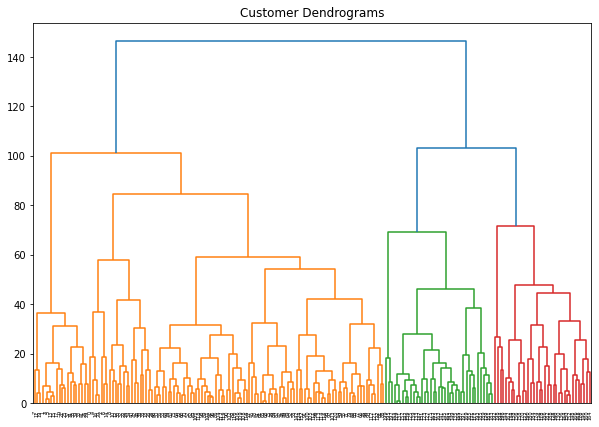

In [ ]:
# 7. Visualisation de la construction des clusters

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

**2.1.2. Partitional Clustering**

**2.1.2.1. K-means**

In [ ]:
# Importation des bibliothèques
from sklearn.cluster import KMeans 

#Construction du modèle en choisissant 5 le nombre de cluster
kmeans=KMeans(n_clusters=5, random_state=0) 

#Entrainment du modèle
kmeans =kmeans.fit(data)

#Afficher à quel cluster appartient chaque échantillon
labels = pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,3
197,1
198,3


In [ ]:
data['labels']=labels
data['labels']
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


In [ ]:
#Afficher les coordonnées des centroïdes
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]]


In [ ]:
kmeans.cluster_centers_[:, 2]

array([26.30434783, 86.53846154, 55.29113924, 87.75      , 26.30434783])

In [ ]:
kmeans.cluster_centers_[:, 3]

array([20.91304348, 82.12820513, 49.56962025, 17.58333333, 78.56521739])

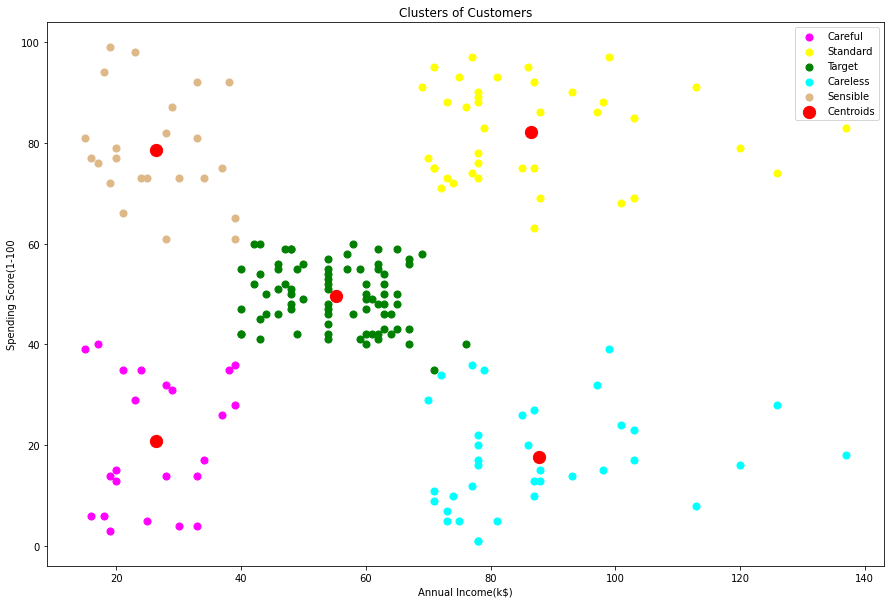

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data["Annual Income (k$)"][data['labels'] == 0],          
            data["Spending Score (1-100)"][data['labels'] == 0],s=50,c='magenta',label='Careful')
plt.scatter(data["Annual Income (k$)"][data['labels'] == 1],
           data["Spending Score (1-100)"][data['labels'] == 1],s=50,c='yellow',label='Standard')
plt.scatter(data["Annual Income (k$)"][data['labels'] == 2],
           data["Spending Score (1-100)"][data['labels'] == 2],s=50,c='green',label='Target')
plt.scatter(data["Annual Income (k$)"][data['labels'] == 3], 
           data["Spending Score (1-100)"][data['labels'] == 3],s=50,c='cyan',label='Careless')
plt.scatter(data["Annual Income (k$)"][data['labels'] == 4], 
           data["Spending Score (1-100)"][data['labels'] == 4],s=50,c='burlywood',label='Sensible')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=150, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()


In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])